In [2]:
from sklearn.metrics import classification_report
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
print('import finish')

import finish


In [175]:
joint_number = 6

In [176]:
datasets = []
for file_name in list(os.listdir('datasets')):
    dataset = pd.read_table(f'datasets/{file_name}', sep=' ')
    datasets.append(dataset)
    print(dataset.shape)


In [177]:
datasets[0]

IndexError: list index out of range

In [ ]:
datasets[0][cols]

,VelLHipYaw,VelLHipPitch,VelLHipRoll,VelLKnee,VelLAnklePitch,VelLAnkleRoll,VelRHipYaw,VelRHipPitch,VelRHipRoll,VelRKnee,VelRAnklePitch,VelRAnkleRoll
0,0.272607,0.242800,-0.072989,-0.335531,-0.538789,2.276552,-0.259410,0.245982,0.000492,-0.327646,-0.542644,2.276552
1,0.520100,0.471178,-0.172483,-0.665216,-1.068921,4.513326,-0.488851,0.473014,-0.005480,-0.646707,-1.075933,4.513326
2,0.767316,0.698055,-0.230214,-0.994118,-1.601251,5.977448,-0.763017,0.674184,0.003230,-0.957975,-1.610204,5.977448
3,1.017121,0.923616,-0.255423,-1.317282,-2.133756,5.919390,-0.763707,0.897571,-0.017304,-1.263438,-2.157639,5.919390
4,1.269961,1.150867,-0.250698,-1.642456,-2.669009,5.861479,-0.758720,1.118653,-0.031175,-1.568047,-2.707856,5.861479
...,...,...,...,...,...,...,...,...,...,...,...,...
50904,0.014611,1.606751,0.826813,5.879413,-0.006679,-0.083910,0.085818,5.809995,0.591961,0.237953,0.269203,-0.083910
50905,0.014522,1.555940,0.316913,5.821923,0.002028,-0.060592,0.084924,5.795086,0.565243,0.235926,0.265983,-0.060592
50906,-0.009751,1.661379,0.842080,5.758707,-0.003936,-0.065899,0.091007,5.784709,0.539599,0.231990,0.264790,-0.065899
50907,0.014790,1.572996,0.216722,5.708850,0.001908,-0.059876,0.082956,5.763597,0.513717,0.229365,0.260138,-0.059876


In [ ]:
full_datasets = []
for dataset in datasets:
    time = dataset['time']
    col_names_vel = [el for el in datasets[0].columns if el.startswith('Vel')]
    velocities = dataset[col_names_vel]
    diff_v = np.diff(velocities, axis=0)
    diff_t = np.diff(time, axis=0)
    col_names_acc = [el.replace('Vel', 'Acc') for el in col_names_vel]
    acc = pd.DataFrame(np.transpose(np.transpose(diff_v)/diff_t), columns=col_names_acc)
    dataset_with_acc = dataset.join(acc)
    full_datasets.append(dataset_with_acc[:-1])
    print(dataset_with_acc.shape)

full_dataset = pd.concat(full_datasets)
print(full_dataset.shape)


(50909, 49)
(3386, 49)
(54293, 49)


In [ ]:
full_dataset

,time,PosLHipYaw,VelLHipYaw,ForLHipYaw,PosLHipPitch,VelLHipPitch,ForLHipPitch,PosLHipRoll,VelLHipRoll,ForLHipRoll,...,AccLHipRoll,AccLKnee,AccLAnklePitch,AccLAnkleRoll,AccRHipYaw,AccRHipPitch,AccRHipRoll,AccRKnee,AccRAnklePitch,AccRAnkleRoll
0,0.000500,0.000226,0.272607,-30.000000,0.000121,0.242800,-30.0,-0.001221,-0.072989,-30.000000,...,-198.988205,-659.369080,-1060.263822,4473.546769,-458.882191,454.063394,-11.943163,-638.122767,-1066.578576,4473.546769
1,0.001000,0.000486,0.520100,-30.000000,0.000357,0.471178,-30.0,-0.001308,-0.172483,-30.000000,...,-115.462192,-657.803700,-1064.661338,2928.245746,-548.331895,402.340201,17.419342,-622.534437,-1068.541600,2928.245746
2,0.001500,0.000870,0.767316,-30.000000,0.000706,0.698055,-30.0,-0.001423,-0.230214,-30.000000,...,-50.417475,-646.327986,-1065.008704,-116.116505,-1.380443,446.774529,-41.067471,-610.925694,-1094.869911,-116.116505
3,0.002000,0.001379,1.017121,-30.000000,0.001168,0.923616,-30.0,-0.001550,-0.255423,-30.000000,...,9.448706,-650.347603,-1070.506397,-115.822773,9.975432,442.164587,-27.742579,-609.218974,-1100.434600,-115.822773
4,0.002500,0.002014,1.269961,-30.000000,0.001743,1.150867,-30.0,-0.001676,-0.250698,-30.000000,...,18.475112,-651.158226,-1072.676483,-114.213925,112.983804,1048.281021,-78.331309,-569.649841,-1133.750730,-114.213925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,1.690469,-0.480568,-0.084824,-7.696019,0.039276,0.317030,30.0,-0.367366,-2.790892,7.262693,...,6.557463,-115.888412,0.774972,-0.357680,-0.953814,56.453505,-24.560563,-62.236052,-0.596131,-0.357680
3381,1.690969,-0.480612,-0.087983,-8.157552,0.039437,0.323446,30.0,-0.368760,-2.787613,6.001895,...,5.722461,-115.888412,0.774972,-0.119226,-1.192265,54.963758,-25.156891,-61.759180,2.026850,-0.119226
3382,1.691469,-0.480658,-0.090963,-8.594322,0.039602,0.329407,30.0,-0.370152,-2.784752,4.756299,...,7.988555,-115.173104,0.000000,-0.357680,-0.119229,53.651884,-26.468288,-60.329041,-1.549945,-0.357680
3383,1.691969,-0.480704,-0.093169,-9.032771,0.039769,0.334876,30.0,-0.371542,-2.780758,3.550321,...,8.941822,-115.410587,-0.119225,0.596133,-1.073036,52.489270,-26.945160,-60.328565,0.953814,0.596133


In [ ]:
def plot_(name):
    col = [el for el in full_dataset.columns if el.startswith(name)]
    val = full_dataset[col]
    i = val.iloc[1000:5000, 1]
    plt.plot(range(len(i)), i)
    plt.show()

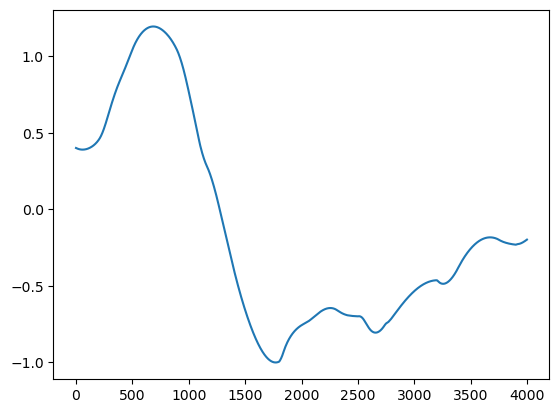

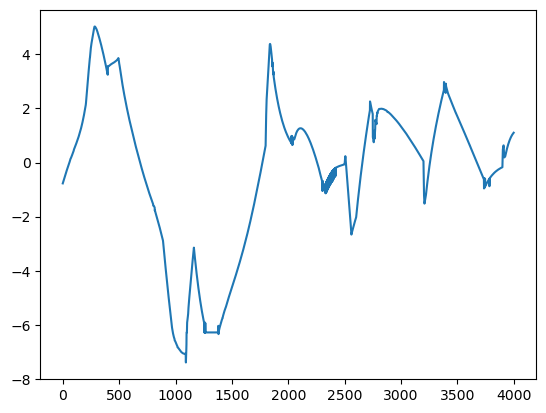

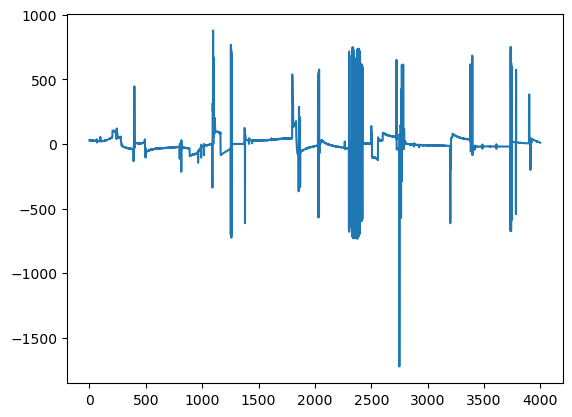

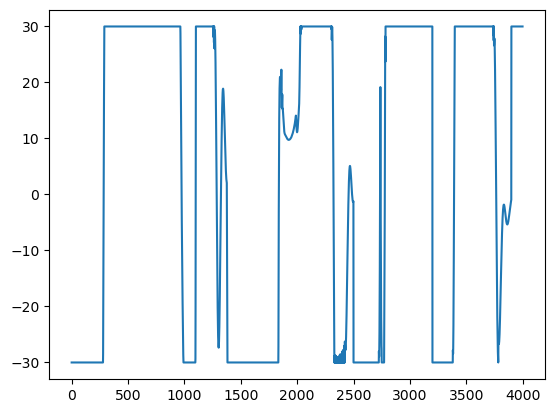

In [ ]:
plot_('Pos')
plot_('Vel')
plot_('Acc')
plot_('For')

# data preprocessing

In [ ]:
df = full_dataset
print(df.shape)
normalized_dataset = (df-df.min())/(df.max()-df.min())
normalized_dataset['time'] = full_dataset['time']
normalized_dataset

(54293, 49)


,time,PosLHipYaw,VelLHipYaw,ForLHipYaw,PosLHipPitch,VelLHipPitch,ForLHipPitch,PosLHipRoll,VelLHipRoll,ForLHipRoll,...,AccLHipRoll,AccLKnee,AccLAnklePitch,AccLAnkleRoll,AccRHipYaw,AccRHipPitch,AccRHipRoll,AccRKnee,AccRAnklePitch,AccRAnkleRoll
0,0.000500,0.464652,0.525095,0.000000,0.449632,0.482361,0.0,0.449647,0.500075,0.000000,...,0.623162,0.269706,0.610906,0.252674,0.369847,0.742425,0.410541,0.640678,0.165434,0.252674
1,0.001000,0.464856,0.544509,0.000000,0.449736,0.494349,0.0,0.449594,0.493285,0.000000,...,0.632711,0.269794,0.610771,0.226511,0.354975,0.735560,0.416754,0.641961,0.165402,0.226511
2,0.001500,0.465158,0.563901,0.000000,0.449890,0.506258,0.0,0.449524,0.489346,0.000000,...,0.640147,0.270442,0.610760,0.174968,0.445914,0.741458,0.404378,0.642917,0.164977,0.174968
3,0.002000,0.465558,0.583496,0.000000,0.450093,0.518097,0.0,0.449445,0.487626,0.000000,...,0.646992,0.270215,0.610592,0.174973,0.447802,0.740846,0.407197,0.643057,0.164887,0.174973
4,0.002500,0.466057,0.603329,0.000000,0.450347,0.530026,0.0,0.449369,0.487948,0.000000,...,0.648024,0.270169,0.610525,0.175000,0.464929,0.821288,0.396492,0.646314,0.164348,0.175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,1.690469,0.086493,0.497057,0.371733,0.466891,0.486258,1.0,0.225328,0.314609,0.621045,...,0.646661,0.300369,0.643435,0.176928,0.445985,0.689655,0.407871,0.688080,0.182667,0.176928
3381,1.690969,0.086458,0.496809,0.364041,0.466962,0.486594,1.0,0.224474,0.314833,0.600032,...,0.646566,0.300369,0.643435,0.176932,0.445945,0.689458,0.407745,0.688120,0.182710,0.176932
3382,1.691469,0.086423,0.496576,0.356761,0.467035,0.486907,1.0,0.223621,0.315028,0.579272,...,0.646825,0.300410,0.643412,0.176928,0.446124,0.689284,0.407467,0.688237,0.182652,0.176928
3383,1.691969,0.086386,0.496403,0.349454,0.467109,0.487194,1.0,0.222769,0.315301,0.559172,...,0.646934,0.300396,0.643408,0.176944,0.445965,0.689129,0.407366,0.688237,0.182693,0.176944


In [3]:
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    return df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

In [4]:
remove_outliers(normalized_dataset)


NameError: name 'normalized_dataset' is not defined

In [ ]:
def split_to_x_y(table):
    X_names = [el for el in table.columns if el.startswith('Pos') or el.startswith('Vel') or el.startswith('Acc')]
    Y_names = [el for el in table.columns if el.startswith('For')]
    return table[X_names], table[Y_names]

In [ ]:
# divide dataset into train and test by fraction
def split_train_test(table, fraction):
    train_size = int(len(table) * fraction)
    return table[:train_size], table[train_size:]

In [ ]:
train, test = split_train_test(normalized_dataset, 0.95)
(trainX, trainY), (testX, testY) = split_to_x_y(train), split_to_x_y(test)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=((joint_number * 3), )))
# hidden
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
# output layer
model.add(Dense(joint_number, activation="softmax"))

In [ ]:
def coeff_determination(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
# ALL OUTPUTS
# train the model using SGD
epochs = 1000
print("[INFO] training network...")
model.compile(loss="mse", optimizer=SGD(0.01),
              metrics=['mae', coeff_determination]
              )
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs)


[INFO] training network...


ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1)))

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["coeff_determination"], label="train_r_square")
plt.plot(np.arange(0, epochs),
         H.history["val_coeff_determination"], label="val_r_square")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()